### Importing relevant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the data

In [2]:
raw_data= pd.read_csv('Index2018.csv')

In [3]:
df_comp=raw_data.copy()

### Length of the Time Period

In [4]:
df_comp.date.describe()

count           6269
unique          6269
top       05/10/1999
freq               1
Name: date, dtype: object

In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### From text to date

In [6]:
df_comp.date= pd.to_datetime(df_comp.date,dayfirst=True)

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [8]:
df_comp.date.describe(datetime_is_numeric=False)

<ipython-input-8-5d732c4db4bc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe(datetime_is_numeric=False)


count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

In [9]:
df_comp.set_index('date',inplace=True)

In [10]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the desired frequency

In [11]:
df_comp=df_comp.asfreq('b')

In [12]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing values

In [13]:
df_comp.isnull()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [14]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:
df_comp.spx=df_comp.spx.fillna(method='ffill')

In [16]:
df_comp.isnull().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [17]:
df_comp.ftse=df_comp.ftse.fillna(method='bfill')

In [18]:
df_comp.isnull().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [19]:
df_comp.dax =df_comp.dax.fillna(value= df_comp.dax.mean())

In [20]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [21]:
df_comp.nikkei =df_comp.nikkei.fillna(value= df_comp.nikkei.mean())

In [22]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Splitting the data

In [23]:
df_comp['market_value']= df_comp.spx

In [24]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [25]:
del df_comp['spx']

In [26]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4040.545253,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10711.090000,992.715221
50%,5774.380000,5663.300000,15014.040000,1233.761241
75%,7442.660000,6304.630175,17858.420000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [27]:
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

In [28]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Simplifying the dataset

In [29]:
size= int(len(df_comp)*0.8)

In [30]:
df = df_comp.iloc[:size]

In [31]:
df_test= df_comp.iloc[size:]

In [32]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [33]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

In [34]:
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))

In [40]:
df['wn']= wn

<ipython-input-40-d80ef1126b8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn']= wn


In [41]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.063677
std,292.559287,291.557365
min,438.920000,7.561926
25%,914.620000,893.427335
50%,1144.650000,1098.858421
75%,1316.280729,1289.277417
max,1570.252238,2072.089728


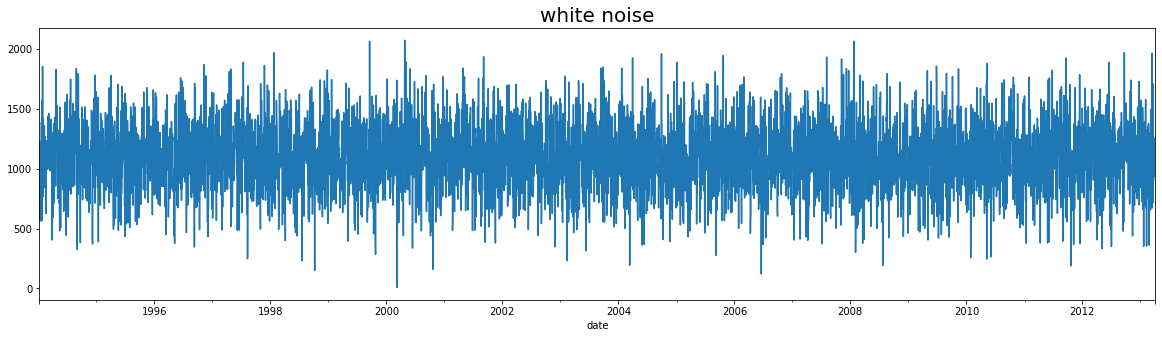

In [42]:
df.wn.plot(figsize=(20,5))
plt.title("white noise",size=20)
plt.show()

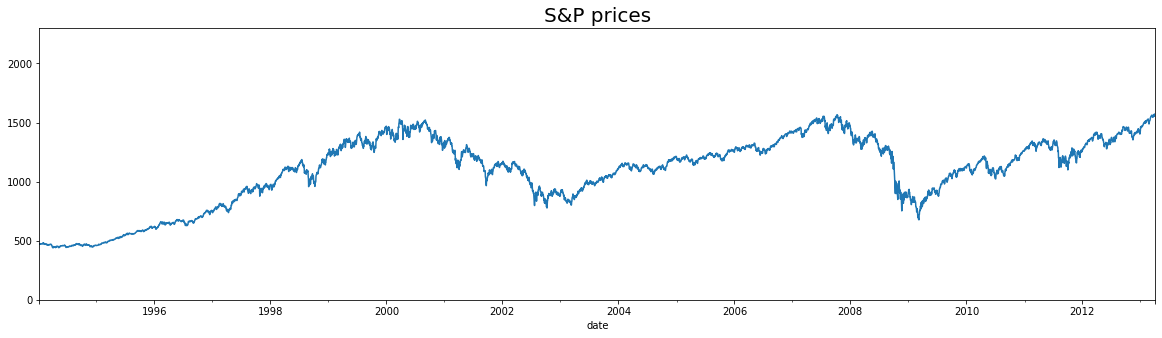

In [43]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P prices",size=20)
plt.ylim(0,2300)
plt.show()


### Random Walk

In [44]:
rw= pd.read_csv("RandWalk.csv")
rw.date= pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw=rw.asfreq("b")

In [45]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [46]:
df['rw']=rw.price

<ipython-input-46-ba182e42fbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw']=rw.price


In [47]:
df

,market_value,wn,rw
date,,,
1994-01-07,469.900000,749.475853,1122.139662
1994-01-10,475.270000,1227.683098,1080.347860
1994-01-11,474.130000,862.935075,1082.095245
1994-01-12,474.170000,561.657350,1083.639265
1994-01-13,472.470000,925.894000,1067.146255
...,...,...,...
2013-04-01,1562.173837,1114.038335,2263.675474
2013-04-02,1570.252238,933.788127,2225.000870
2013-04-03,1553.686978,950.174200,2190.787688


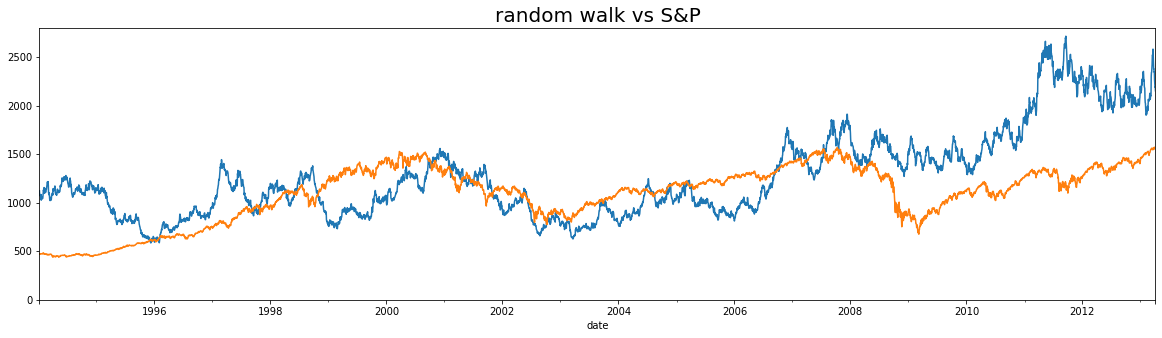

In [48]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title("random walk vs S&P",size=20)
plt.ylim(0,2800)
plt.show()

### Stationarity

In [49]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt

In [50]:
sts.adfuller(df.market_value)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [51]:
sts.adfuller(df.wn)

(-71.35080725670441,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70775.31483563613)

In [52]:
sts.adfuller(df.rw)

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

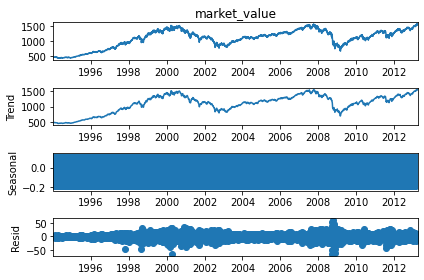

In [53]:
s_dec_additive= seasonal_decompose(df.market_value,model="additive")
s_dec_additive.plot()
plt.show()

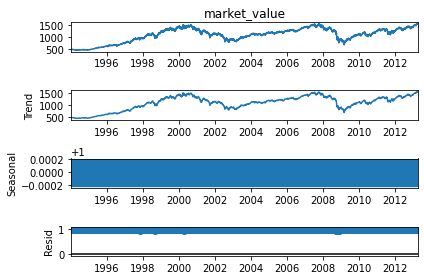

In [54]:
s_dec_mult= seasonal_decompose(df.market_value,model="multiplicative")
s_dec_mult.plot()
plt.show()

### ACF

Text(0.5, 1.0, 'ACF S&P')

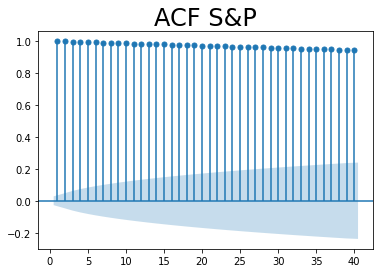

In [55]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title("ACF S&P",size=24)

Text(0.5, 1.0, 'ACF wn')

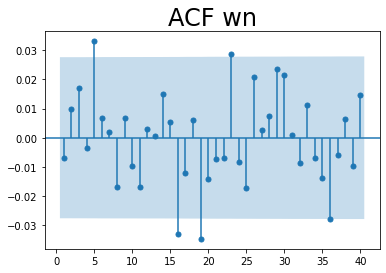

In [56]:
sgt.plot_acf(df.wn,lags=40,zero=False)
plt.title("ACF wn",size=24)

Text(0.5, 1.0, 'ACF rw')

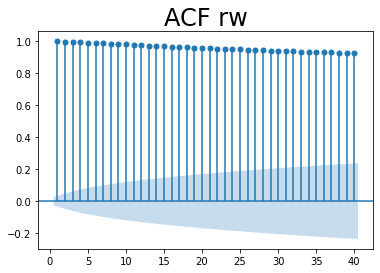

In [57]:
sgt.plot_acf(df.rw,lags=40,zero=False)
plt.title("ACF rw",size=24)

### PACF

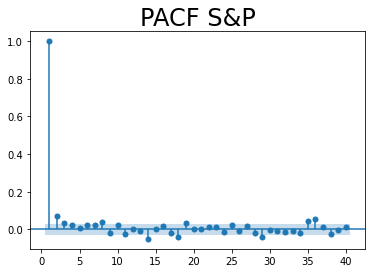

In [58]:
sgt.plot_pacf(df.market_value,lags=40,zero=False,method=('ols'))
plt.title("PACF S&P",size=24)
plt.show()

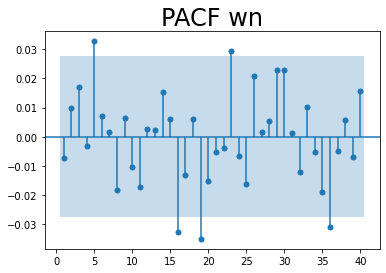

In [59]:
sgt.plot_pacf(df.wn,lags=40,zero=False,method=('ols'))
plt.title("PACF wn",size=24)
plt.show()

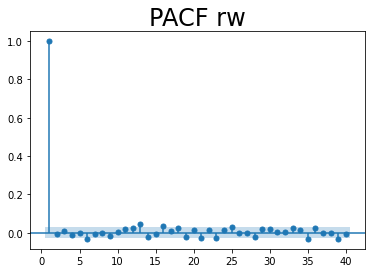

In [60]:
sgt.plot_pacf(df.rw,lags=40,zero=False,method=('ols'))
plt.title("PACF rw",size=24)
plt.show()